# List of exercises - 2 (answers)

author: Lucas Tavares @lucaase

## Loading the data (remember to import the 'LFP_HG_HFO.mat' file to your workspace first)

In [9]:
import numpy as np
from scipy.io import loadmat
from scipy.signal import welch, spectrogram
import matplotlib.pyplot as plt

mat = loadmat('LFP_HG_HFO.mat')

lfpHG = mat['lfpHFO'][0]
lfpHFO = mat['lfpHG'][0]

## Questions

Text(0.5, 1.0, 'HFO')

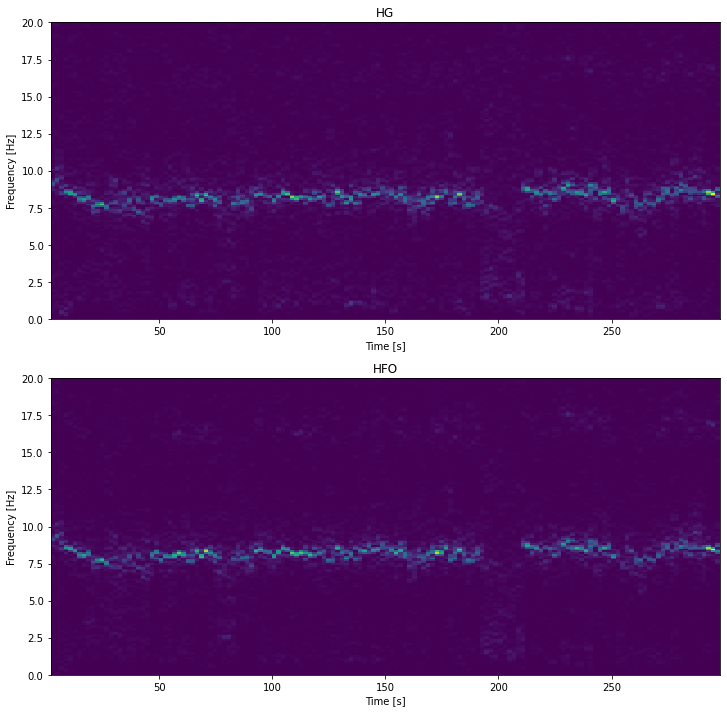

In [13]:
# Question 1
srate = 1000.
window_length = 4*srate
overlap = 0.5*window_length
nfft = 2**13

F,T,SxxHG = spectrogram(lfpHG,srate,nperseg=int(window_length),noverlap=overlap,nfft=nfft)
F,T,SxxHFO = spectrogram(lfpHFO,srate,nperseg=int(window_length),noverlap=overlap,nfft=nfft)

# Question 2

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.pcolormesh(T,F,SxxHG)
plt.ylim([0,20])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('HG')

plt.subplot(212)
plt.pcolormesh(T,F,SxxHFO)
plt.ylim([0,20])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('HFO')


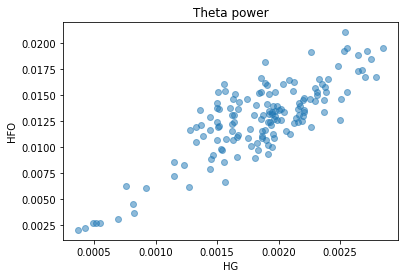

In [15]:
# Question 3
Itheta = (F>6)*(F<10)
ThetaPower1 = np.mean(SxxHG[Itheta],0)
ThetaPower2 = np.mean(SxxHFO[Itheta],0)

# Question 4
plt.scatter(ThetaPower1, ThetaPower2, alpha=0.5)
plt.title('Theta power')
plt.xlabel('HG')
plt.ylabel('HFO')
plt.show()


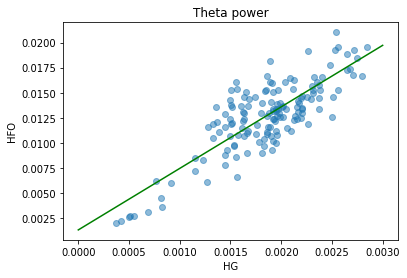

In [32]:
# Question 5
linear_model=np.polyfit(ThetaPower1,ThetaPower2,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,0.004,0.001)



plt.scatter(ThetaPower1, ThetaPower2, alpha=0.5)
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.title('Theta power')
plt.xlabel('HG')
plt.ylabel('HFO')

plt.show()

In [16]:
# Question 6
rho = np.corrcoef(ThetaPower1,ThetaPower2)
print(rho)

[[1.         0.82337577]
 [0.82337577 1.        ]]


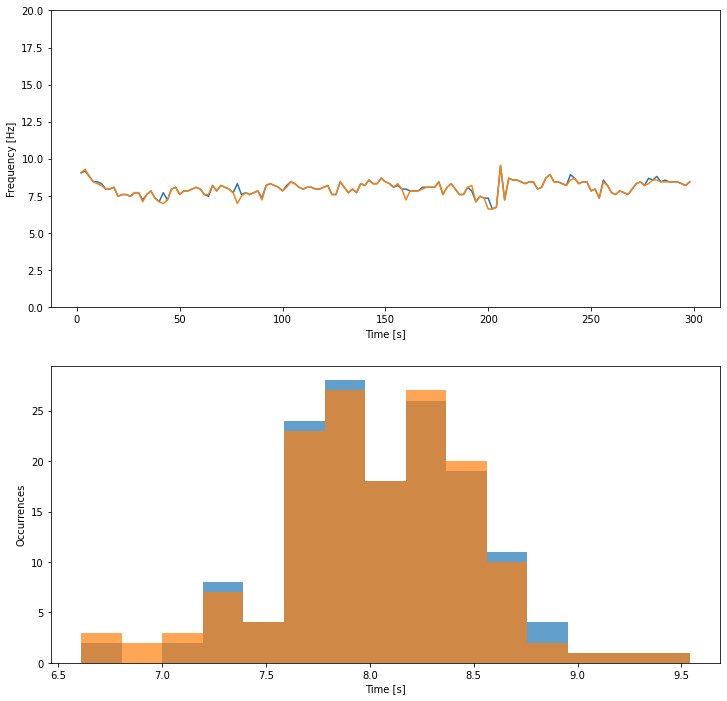

In [80]:
# Question 7
Itheta = (F>6)*(F<10)
IdxThetaHG = np.argmax(SxxHG[Itheta],axis=0)
IdxThetaHFO = np.argmax(SxxHFO[Itheta],axis=0)

peakThetaHG = F[IdxThetaHG] + 6
peakThetaHFO = F[IdxThetaHFO] + 6

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(T,peakThetaHG)
plt.plot(T,peakThetaHFO)
plt.ylim([0,20])
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')


plt.subplot(212)
plt.hist(peakThetaHG, 15, alpha = 0.7)
plt.hist(peakThetaHFO, 15, alpha = 0.7)
plt.xlabel('Time [s]')
plt.ylabel('Occurrences')

plt.show()

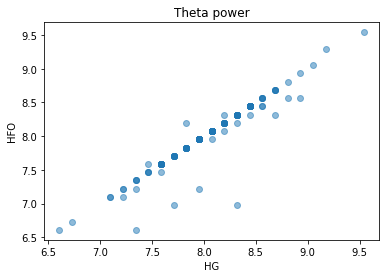

In [82]:
# Question 8 (4)
plt.scatter(peakThetaHG, peakThetaHFO, alpha=0.5)
plt.title('Theta power')
plt.xlabel('HG')
plt.ylabel('HFO')
plt.show()

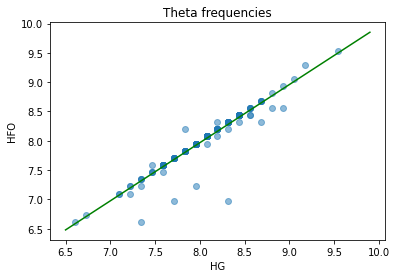

In [85]:
# Question 8 (5)
linear_model=np.polyfit(peakThetaHG,peakThetaHFO,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(6.5,10,0.1)

plt.scatter(peakThetaHG, peakThetaHFO, alpha=0.5)
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.title('Theta frequencies')
plt.xlabel('HG')
plt.ylabel('HFO')

plt.show()

In [81]:
# Question 8 (6)
rho = np.corrcoef(peakThetaHG,peakThetaHFO)
print(rho)

[[1.         0.94243512]
 [0.94243512 1.        ]]
